# Inputs

The Inputs section establishes all the foundational elements required for the project. It includes importing essential libraries, loading the dataset, and defining key parameters for the neural network.

## Libraries

This subsection imports all the Python libraries required for the notebook.

In [ ]:
import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
from esda.moran import Moran
from splot.esda import plot_moran
from esda.moran import Moran_Local
from splot.esda import plot_local_autocorrelation
import seaborn as sns
from matplotlib.colors import TwoSlopeNorm
from google.colab import drive

## Data

This section loads the dataset used throughout the notebook. It includes reading the data from its source, validating its structure, and performing initial inspections.

In [ ]:
drive.mount('/content/drive')
geo_data = gpd.read_file('/content/drive/MyDrive/DataLab1/counties_detailed.shp')

Mounted at /content/drive


# Data Pre-Treatment

## Data Visualization

This subsection provides an initial look at the dataset by displaying the dataframe. Viewing the raw data helps verify that it loaded correctly, understand its structure, and identify patterns, inconsistencies, or features that may guide further analysis and visualization.

In [ ]:
print('Dataset shape: ',geo_data.shape)
geo_data.head()

Dataset shape:  (55, 52)


,AREA,PERIMETER,NAME,STATE,FIPS,STATE_ABBR,SQUARE_MIL,POP2000,POP00SQMIL,MALE2000,...,1990,2000,2001,2002,2003,2004,2005,2006,per,geometry
0,2.819364e+08,69539.619328,Ohio,54,54069,WV,106.176,47427,446.7,22177,...,50871,47427,46653,46241,45612,45309,44958,44662,0.000868,"POLYGON ((522753.988 4431484.27, 522933.396 44..."
1,8.071574e+08,125167.039523,Marshall,54,54051,WV,306.994,35519,115.7,17288,...,37356,35519,35294,34999,34837,34602,34250,33896,0.001602,"POLYGON ((522753.988 4431484.27, 522920.947 44..."
2,1.686168e+09,179373.536795,Preston,54,54077,WV,648.324,29334,45.2,14535,...,29037,29334,29299,29628,29684,29817,30052,30384,0.013639,"POLYGON ((605953.93 4397497.446, 606406.156 43..."
3,5.954419e+08,145624.281267,Morgan,54,54065,WV,228.983,14943,65.3,7343,...,12128,14943,15227,15317,15545,15745,15987,16337,0.025954,"POLYGON ((749219.462 4385550.735, 749158.156 4..."
4,9.470626e+08,164158.984954,Monongalia,54,54061,WV,361.159,81866,226.7,41291,...,75509,81866,82315,82705,83670,84034,84592,84752,0.001200,"POLYGON ((549590.51 4396972.754, 550334.558 43..."


Since the full dataset cannot be displayed in a single table due to its dimensions, the column names are shown instead to provide an overview of all available variables.

In [ ]:
print(list(geo_data))

['AREA', 'PERIMETER', 'NAME', 'STATE', 'FIPS', 'STATE_ABBR', 'SQUARE_MIL', 'POP2000', 'POP00SQMIL', 'MALE2000', 'FEMALE2000', 'MAL2FEM', 'UNDER18', 'AIAN', 'ASIA', 'BLACK', 'NHPI', 'WHITE', 'AIAN_MORE', 'ASIA_MORE', 'BLK_MORE', 'NHPI_MORE', 'WHT_MORE', 'HISP_LAT', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '1990', '2000', '2001', '2002', '2003', '2004', '2005', '2006', 'per', 'geometry']


## Columns Rearragaments

In this subsection, the dataset’s columns are reordered to improve clarity and usability. Since the original columns are not in a time logical order, rearranging them makes it easier to explore, analyze, and visualize the data systematically.

### Find New Position

The column for the 1990 year is not correctly placed. Therefore, the first step is to find the position in the DataFrame where the column should be.

In [ ]:
index = geo_data.columns.get_loc('1991')
print(f'The colum "1990" should be in the position {index} of the DataFrame')

The colum "1990" should be in the position 33 of the DataFrame


### Move Columns

This subsection is dedicated to relocate the "1990" column within the dataset.

In [ ]:
column_1990 = geo_data.pop('1990')
geo_data.insert(index, '1990', column_1990)
print(list(geo_data))

['AREA', 'PERIMETER', 'NAME', 'STATE', 'FIPS', 'STATE_ABBR', 'SQUARE_MIL', 'POP2000', 'POP00SQMIL', 'MALE2000', 'FEMALE2000', 'MAL2FEM', 'UNDER18', 'AIAN', 'ASIA', 'BLACK', 'NHPI', 'WHITE', 'AIAN_MORE', 'ASIA_MORE', 'BLK_MORE', 'NHPI_MORE', 'WHT_MORE', 'HISP_LAT', '1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', 'per', 'geometry']


The success of the rearrangement process is verified ensuring that the columns are now in the desired order

## Missing Data and Data Types Check

function to inspect the dataset for missing (NaN) values and to review the data types of each column. This step helps assess data completeness and ensures that each column has the appropriate type for subsequent analysis.

In [ ]:
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AREA        55 non-null     float64 
 1   PERIMETER   55 non-null     float64 
 2   NAME        55 non-null     object  
 3   STATE       55 non-null     int32   
 4   FIPS        55 non-null     int32   
 5   STATE_ABBR  55 non-null     object  
 6   SQUARE_MIL  55 non-null     float64 
 7   POP2000     55 non-null     int32   
 8   POP00SQMIL  55 non-null     float64 
 9   MALE2000    55 non-null     int32   
 10  FEMALE2000  55 non-null     int32   
 11  MAL2FEM     55 non-null     int32   
 12  UNDER18     55 non-null     float64 
 13  AIAN        55 non-null     float64 
 14  ASIA        55 non-null     float64 
 15  BLACK       55 non-null     float64 
 16  NHPI        55 non-null     float64 
 17  WHITE       55 non-null     float64 
 18  AIAN_MORE   55 non-null     float64 
 19  AS

It is verified that all columns have no missing values, and the data types are correct.

# Analysis

## 1. Annual Resident Population 1900 vs 2006

This subsection compares the resident population at each location between 1900 and 2006 to analyze temporal changes.

### Descriptive Statistics

This subsection implements a boxplot comparison of county population distributions in West Virginia for 1900 and 2006. The boxplots summarize the central tendency, dispersion, and presence of outliers for each year, allowing a direct comparison of how the distribution of population across counties changed over time.

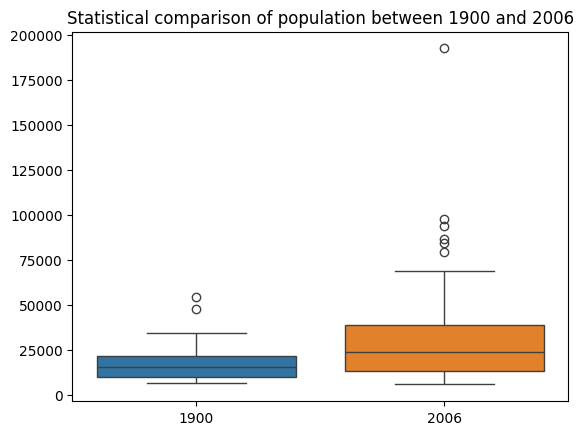

In [ ]:
data=geo_data[["1900", "2006"]]
sns.boxplot(data)
plt.title("Statistical comparison of population between 1900 and 2006")
plt.show()

In [ ]:
data.describe()

,1900,2006
count,55.000000,55.000000
mean,17432.727273,33063.090909
std,9745.789213,32390.012531
min,6693.000000,5980.000000
25%,10275.000000,13465.000000
50%,15434.000000,24132.000000
75%,21705.000000,38932.500000
max,54696.000000,192419.000000


#### Central Tendency



The number of counties in the state of West Virginia is 55.

The mean population per county in 1900 was 17433 people while 33063 by 2006 which reresents an increase of approximately 90%.

The median in 1900 was 15434 people while 24133 in 2006.

#### Indexes of Dispersion

The standard deviation per county in 1900 was 9746 people wheras 32390 by 2006.

The less populated county in 1900 was 6693 people while 5980 in 2006, indicating a decrease of a 11%.

The most populated county used to have 54696 by 1900 while 192419 in 2006, which means a increase of 252%.

Therefore, the population range, difference between max and min, is 48003 in 1900 and 186439 in 2006.

#### Measures of Position


The 25% of the counties had 10275 people or less in 1900 while 13465 in 2006.

The 50% of the counties had 15434 people or less (median) in 1900 while 24132 in 2006.

The 75% of the counties had 21705 people or less in 1900 while 38933 in 2006.

The interqurtile range (IQR) for 1900 is 11430 meaning that the central 50% of the counties have a variability of 11430 people in the range 10275-15434. Regarding 2006, the variability is 25468 people in the range 13465-38933.

### Statistical Dispersion

This subsection presents the respective distributions of the population among counties. Additionally, shape measurements, such as skewness and kurtosis, are performed to assess the asymmetry and peakedness of the distribution around a central point.

#### 1900

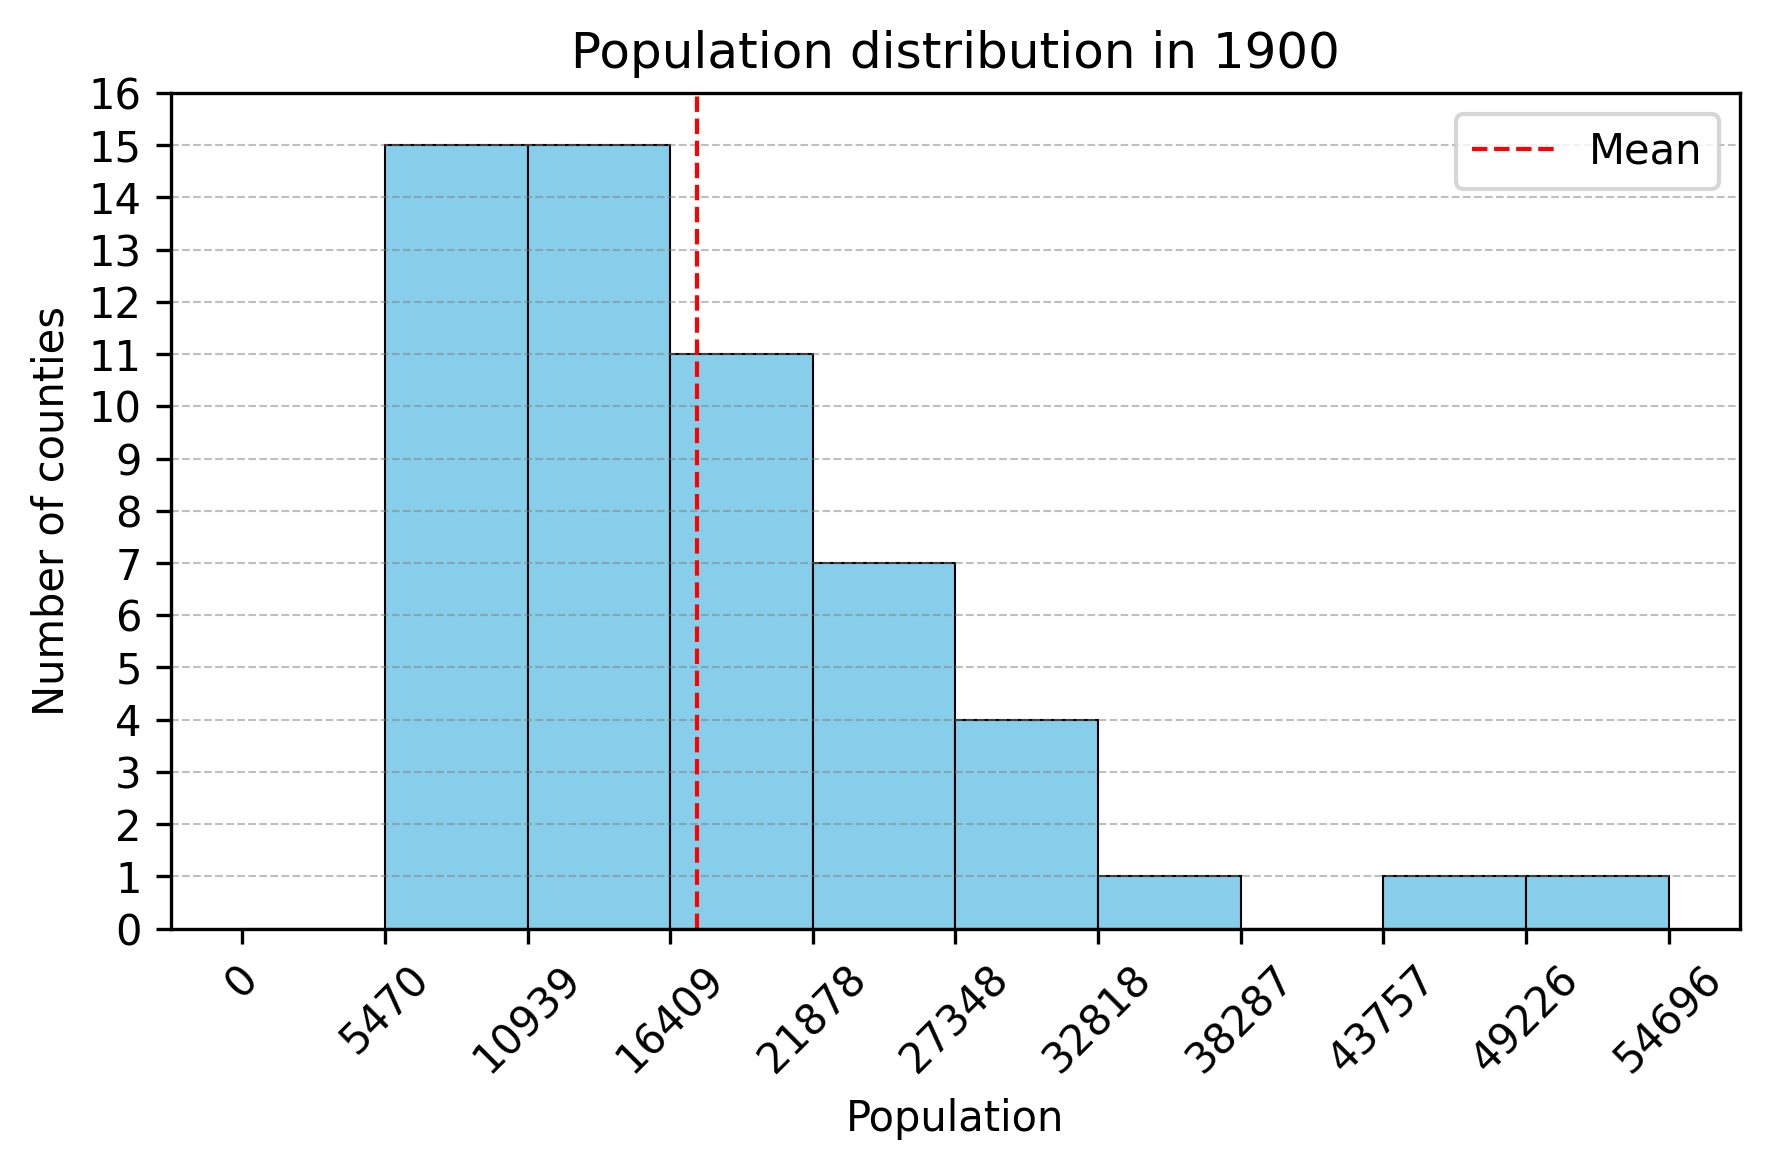

In [ ]:
# Determine the maximum population
max_population_1900 = geo_data['1900'].max()

# Create 10 intervals with same size
bins_1900 = np.linspace(0, max_population_1900, 11)

# Create the histogram
plt.figure(figsize=(6, 4), dpi=300)
plt.hist(geo_data['1900'], bins=bins_1900, edgecolor="black", linewidth=0.5, color='skyblue')

# Calculate the mean
mean_population_1900 = geo_data['1900'].mean()

# Represents the mean
plt.axvline(mean_population_1900, color='red', linestyle='dashed', linewidth=1, label='Mean')

# Calculate the number of counties below the mean
n_counties_below_mean_1900 = (geo_data['1900'] < mean_population_1900).sum()

# Calculate the assymetry index
skew_1900 = geo_data['1900'].skew()

# Calculate the Kurtosis index
Kurtosis_1900 = geo_data['1900'].kurtosis()

# Writhe the limits of each interval
plt.xticks(bins_1900, rotation=45)

# Plot the horizontal grid
plt.yticks(np.arange(0, plt.ylim()[1]+1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray', linewidth=0.5)

plt.legend()
plt.xlabel("Population")
plt.ylabel("Number of counties")
plt.title("Population distribution in 1900")

plt.tight_layout()
plt.show()

It can be seen from the representation that there are two outliers, two counties with population greater than 43757. Aditionally, there is not any county whose poplation is below 5470 inhabitants.  

In [ ]:
print('The mean population per county in 1900 is',round(mean_population_1900))
print(f'The percentage of counties below the mean is {n_counties_below_mean_1900/geo_data.shape[0]}')
print('The asymmetry index is', skew_1900)
print('The Kurtosis index is',Kurtosis_1900)

The mean population per county in 1900 is 17433
The percentage of counties below the mean is 0.5818181818181818
The asymmetry index is 1.7325763926100708
The Kurtosis index is 4.041379785796121


There is a positive skew in the distribution, since the majority of the counties have low values of the variable and therefore lie below the mean. Moreover, the distribution is leptokurtic because the kurtosis value is greater than 0, meaning that the distribution is more peaked than a normal distribution. This is because most of the counties fall within a few consecutive intervals. The population distribution is concentrated, so in this case the majority of the counties have small populations.

#### 2006

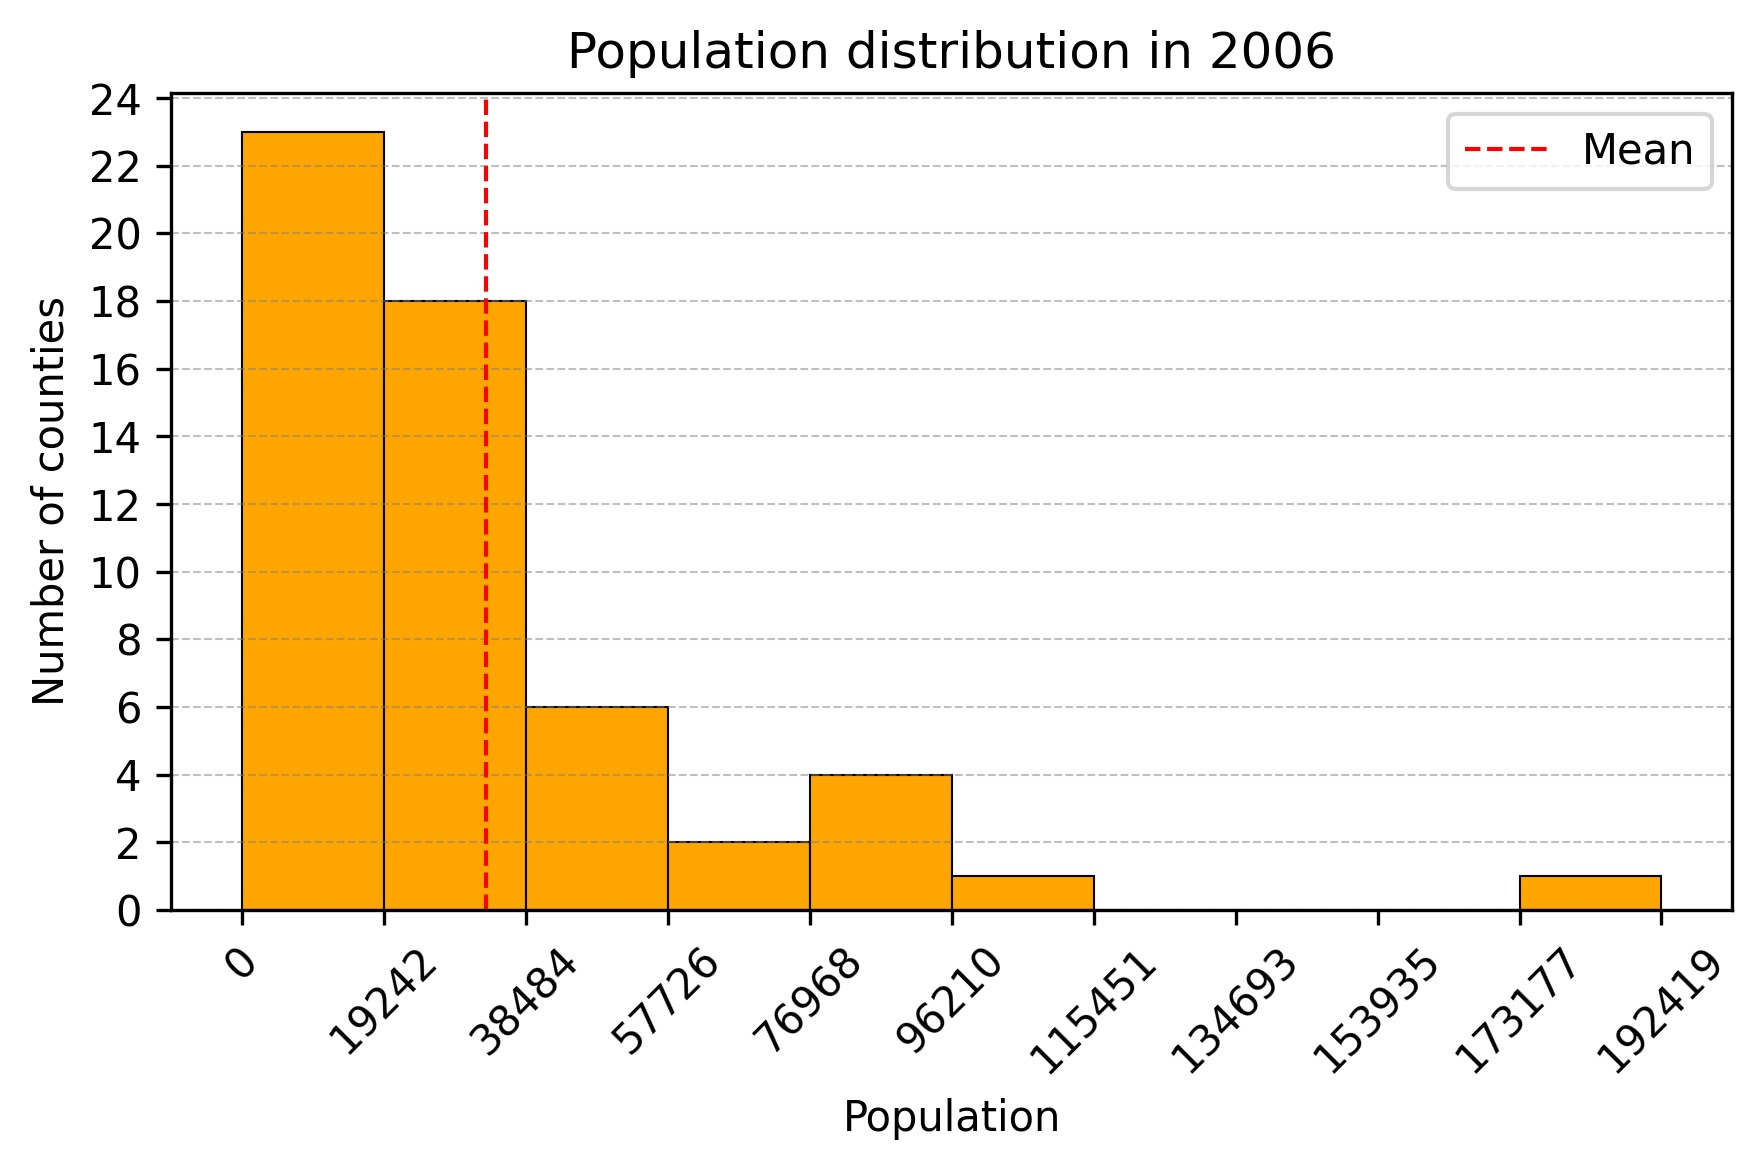

In [ ]:
# Determine the maximum population
max_population_2006 = geo_data['2006'].max()

# Create 10 intervals with same size
bins_2006 = np.linspace(0, max_population_2006, 11)

# Create the histogram
plt.figure(figsize=(6, 4), dpi=300)
plt.hist(geo_data['2006'], bins=bins_2006, edgecolor="black", linewidth=0.5, color='orange')

# Calculate the mean
mean_population_2006 = geo_data['2006'].mean()

# Represents the mean
plt.axvline(mean_population_2006, color='red', linestyle='dashed', linewidth=1, label='Mean')

# Calculate the number of counties below the mean
n_counties_below_mean_2006 = (geo_data['2006'] < mean_population_2006).sum()

# Calculate the assymetry index
skew_2006 = geo_data['2006'].skew()

# Calculate the Kurtosis index
Kurtosis_2006 = geo_data['2006'].kurtosis()

# Writhe the limits of each interval
plt.xticks(bins_2006, rotation=45)

# Plot the horizontal grid
plt.yticks(np.arange(0, plt.ylim()[1]+1, 2)) # Ticks at each unit
plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray', linewidth=0.5)

plt.legend()
plt.xlabel("Population")
plt.ylabel("Number of counties")
plt.title("Population distribution in 2006")

plt.tight_layout()
plt.show()

In [ ]:
print('The mean population per county in 1900 is',round(mean_population_2006))
print(f'The percentage of counties below the mean is {n_counties_below_mean_2006/geo_data.shape[0]}')
print('The asymmetry index is', skew_2006)
print('The Kurtosis index is',Kurtosis_2006)

The mean population per county in 1900 is 33063
The percentage of counties below the mean is 0.6909090909090909
The asymmetry index is 2.698578282431272
The Kurtosis index is 10.076464436615279


The explanation is similar to the one given before, with the difference that in this case, there is only a outlier. Moreover, an even stronger positive skew and a more pronounced leptokurtic shape is shown.

### Cross-Year Analysis by Location

This subsection presents a comparison of county populations in West Virginia for the years 1900 and 2006.

#### Bar Plot representation

The bar plot shows two bars per county, one for each year, allowing for a visual comparison of population changes over time.

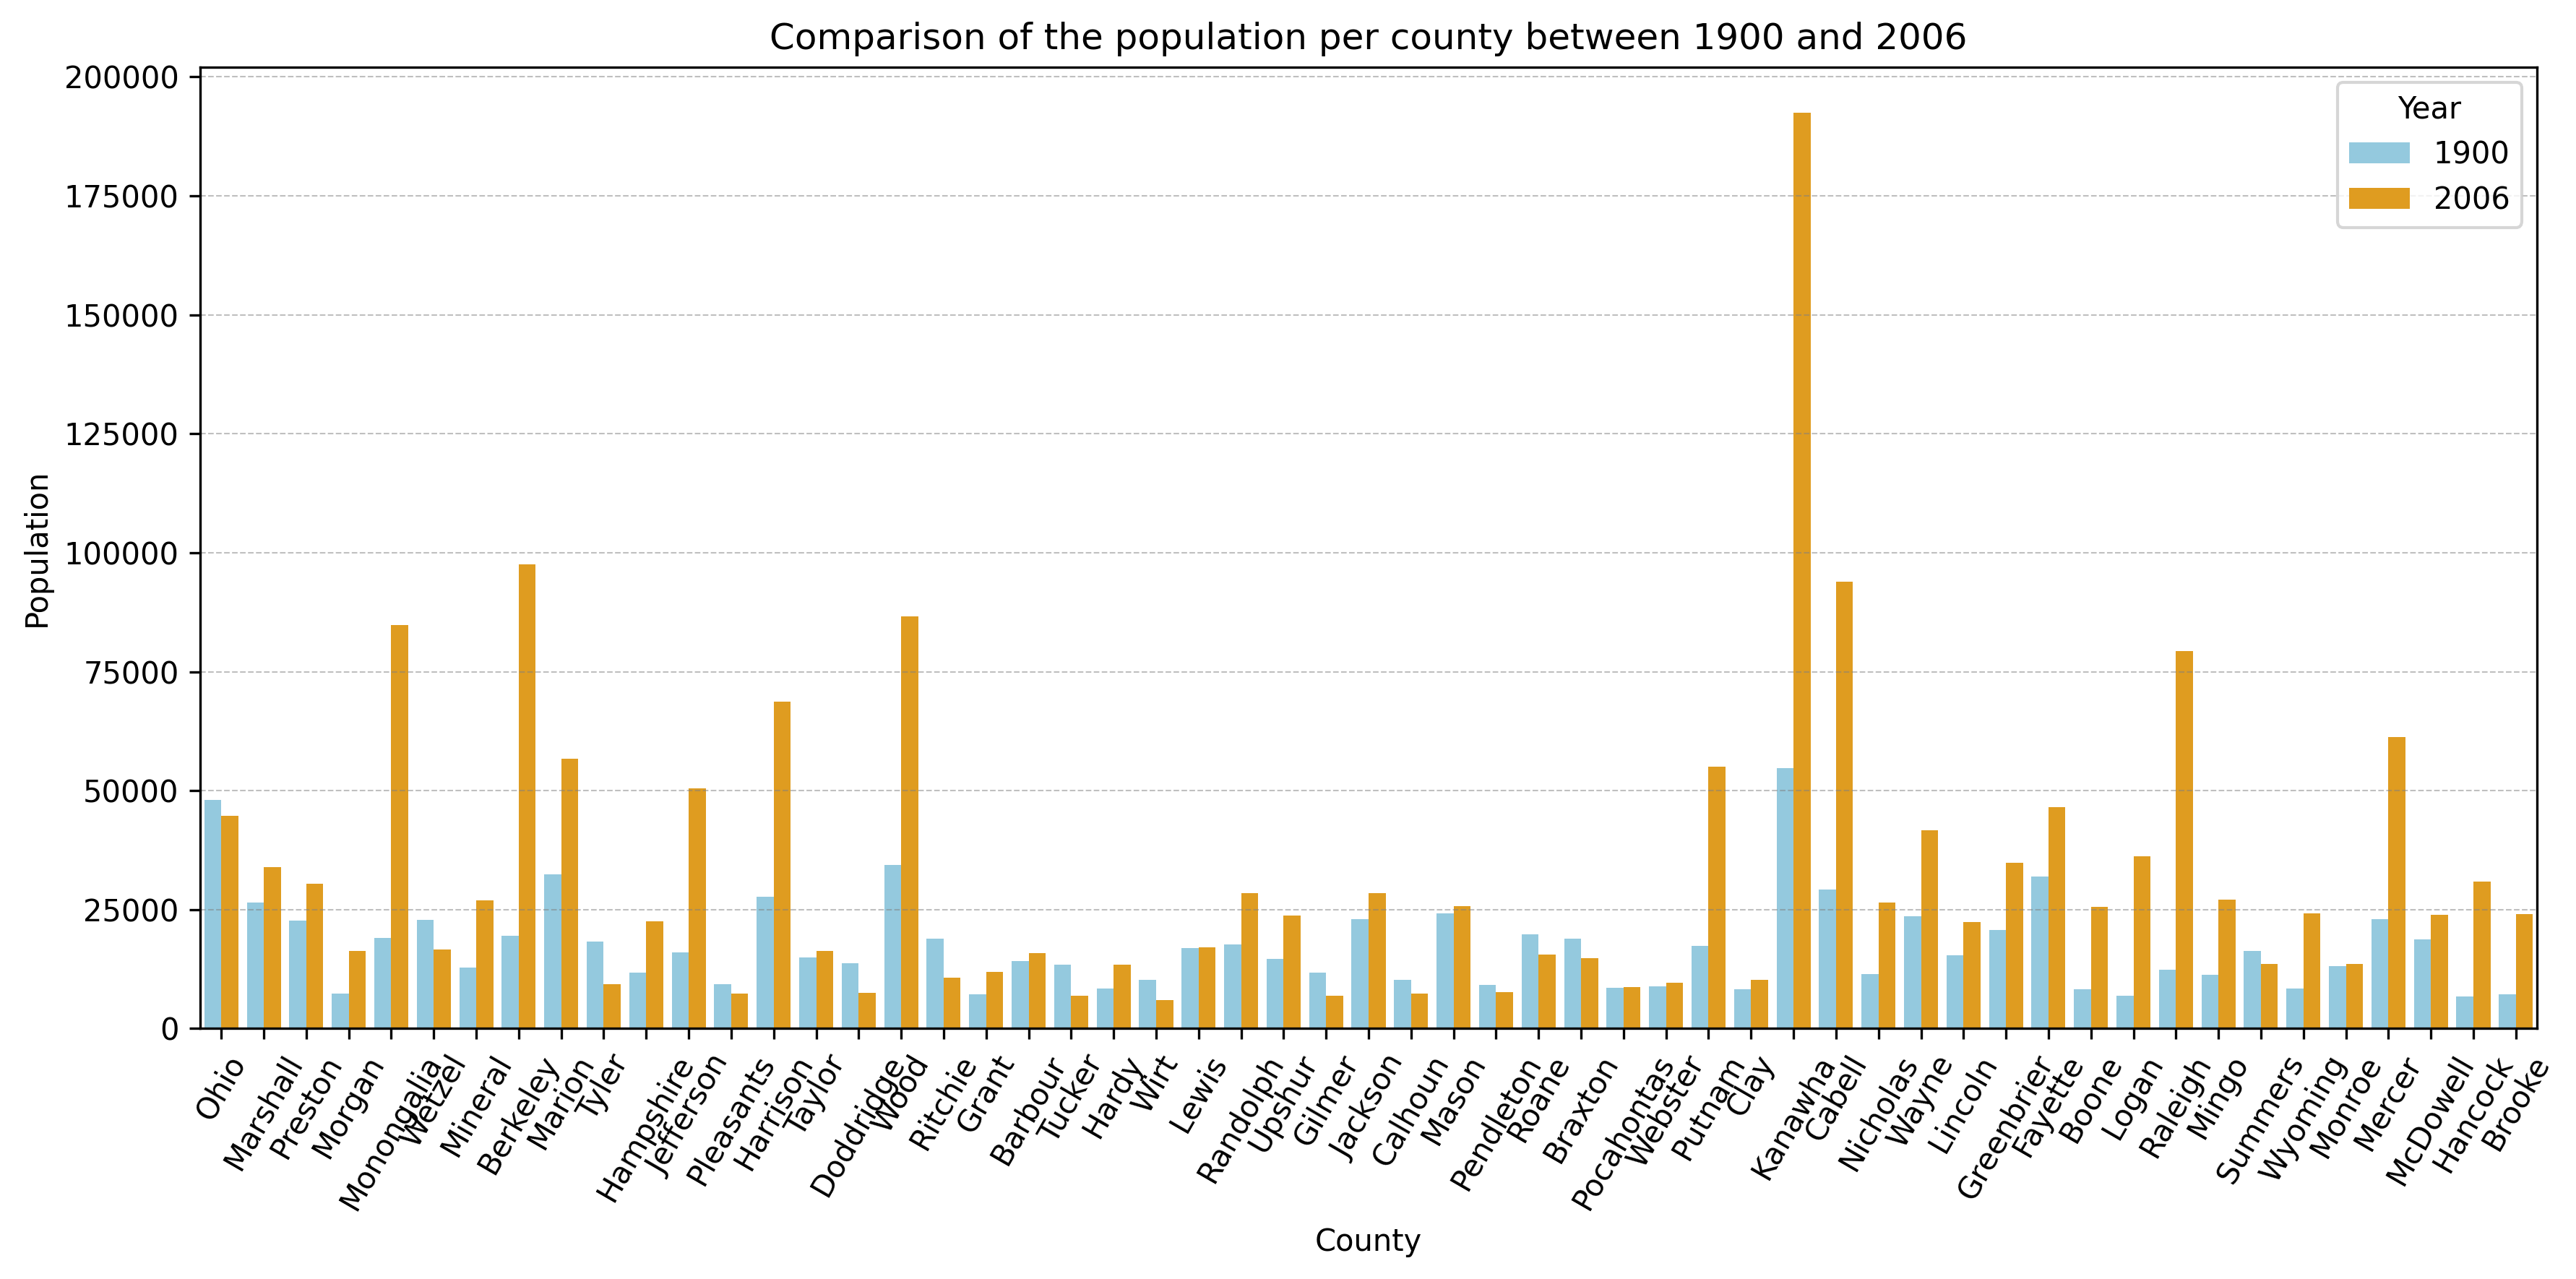

The total population of West Virginia in 1900 was 958800
The total population of West Virginia in 2006 was 1818470
The percentage of population in 2006 with respect to 1900 is 189.6610346266166 %


In [ ]:
# 1. Convert the DataFrame to long format so each row has a county, year, and population
df_long = pd.melt(geo_data, id_vars='NAME', value_vars=['1900','2006'], var_name='Year', value_name='Population')

# 2. Represent the bars plot
plt.figure(figsize=(12,6),dpi=300)
sns.barplot(data=df_long, x='NAME', y='Population', hue='Year', palette=['skyblue', 'orange'])

# 3. Plot the horizontal grid
plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray', linewidth=0.5)

plt.xlabel("County")
plt.ylabel("Population")
plt.title("Comparison of the population per county between 1900 and 2006")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

print('The total population of West Virginia in 1900 was',geo_data['1900'].sum())
print('The total population of West Virginia in 2006 was',geo_data['2006'].sum())
print(f'The percentage of population in 2006 with respect to 1900 is {(geo_data['2006'].sum()/geo_data['1900'].sum())*100} %')

There have been fluctuations in the population of counties: some have lost population while others have gained. In 1900, only a single county had more than 50,000 inhabitants, whereas by 2006 this number had increased to ten counties. Overall, the state of West Virginia experienced an approximate 90% increase in population over slightly more than a century (as it was said before).

#### Geographic map

The geographic maps display statistical information encoded in a color palette. They represent data at the region level, and are appropriate for areal unit data where each observation combines a value of an attribute and a geometric figure, usually a polygon. In this case, population ranges are visualized using a geographic representation, allowing spatial patterns to be identified and interpreted more effectively.

##### 1900

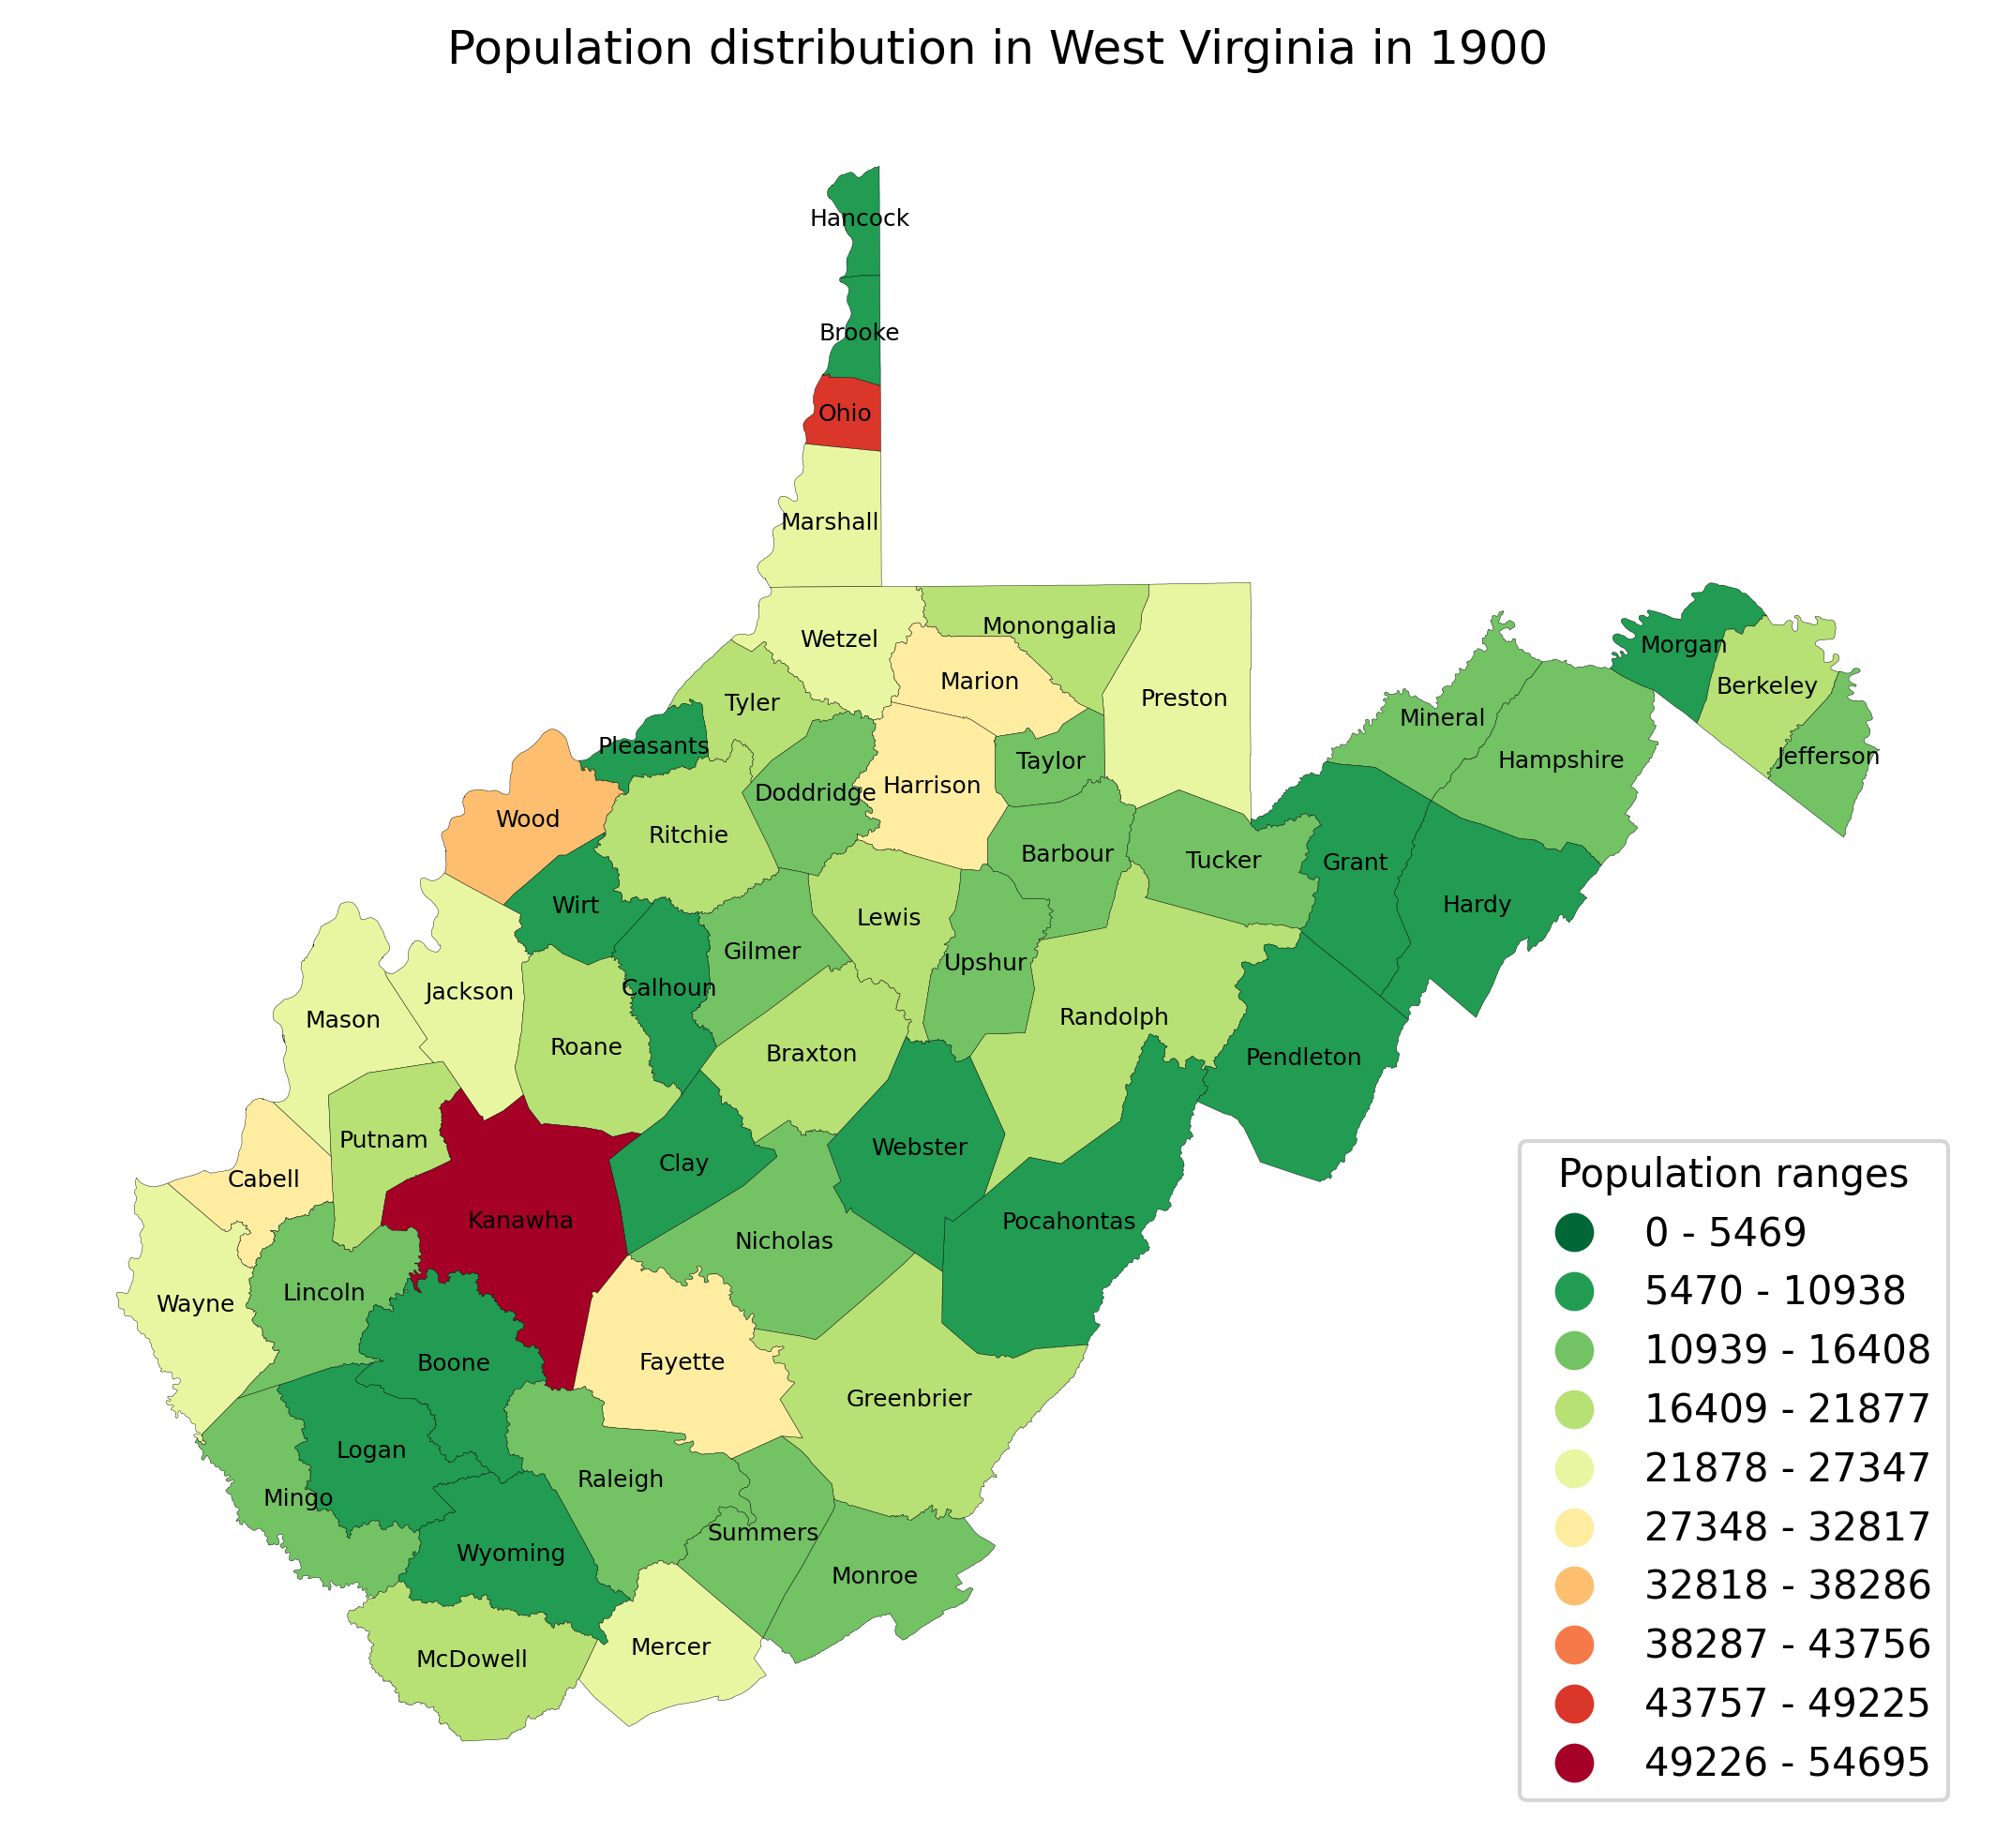

In [ ]:
# Population intervals
bins_fixed_1900 = np.round(np.insert(bins_1900[1:], 0, 0)). astype(int)

# Create the labels for the legend
labels_ranges_1900 = [f"{bins_fixed_1900[i]} - {bins_fixed_1900[i+1]-1}" for i in range(len(bins_fixed_1900)-1)]

# Create a new Dataframe exclusively for these representations not to modify the original
geo_data_aux = geo_data.copy()

# Convert county populations to groups of population ranges
geo_data_aux["bin_1900"] = pd.cut(
    geo_data["1900"],
    bins = bins_fixed_1900,                  # Classification scheme
    include_lowest = True,
    labels = labels_ranges_1900
)

# Create a personalized color pallete
cmap_personalized = sns.color_palette("RdYlGn_r", as_cmap=True)

# Show the choropleth map
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

geo_data_aux.plot(
    ax=ax,
    column="bin_1900",                # Data to plot
    cmap=cmap_personalized,           # Color palette
    edgecolor="k",                    # Borderline color
    linewidth=0.1,                    # Borderline width
    legend=True,                      # Add legend
    legend_kwds={
        "title": "Population ranges", # Title of the legend
        "loc": "lower right"          # Allocate the legend
    }
)

# Add the name of each county
for idx, row in geo_data_aux.iterrows():
    # Obtai the centre of the county
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    # Write the name centered
    ax.text(x, y, str(row['NAME']), fontsize=6, ha='center', va='center')

ax.set_title("Population distribution in West Virginia in 1900")
ax.set_axis_off()

In 1900, county populations in West Virginia were generally low, with most counties falling into the lower and middle population classes shown in the legend. Kanawha County clearly stands out as the most populous county, while only a small number of others reach higher population categories. The majority of counties display similar population sizes, indicating limited concentration and a relatively even distribution across the state at the beginning of the twentieth century.

##### 2006

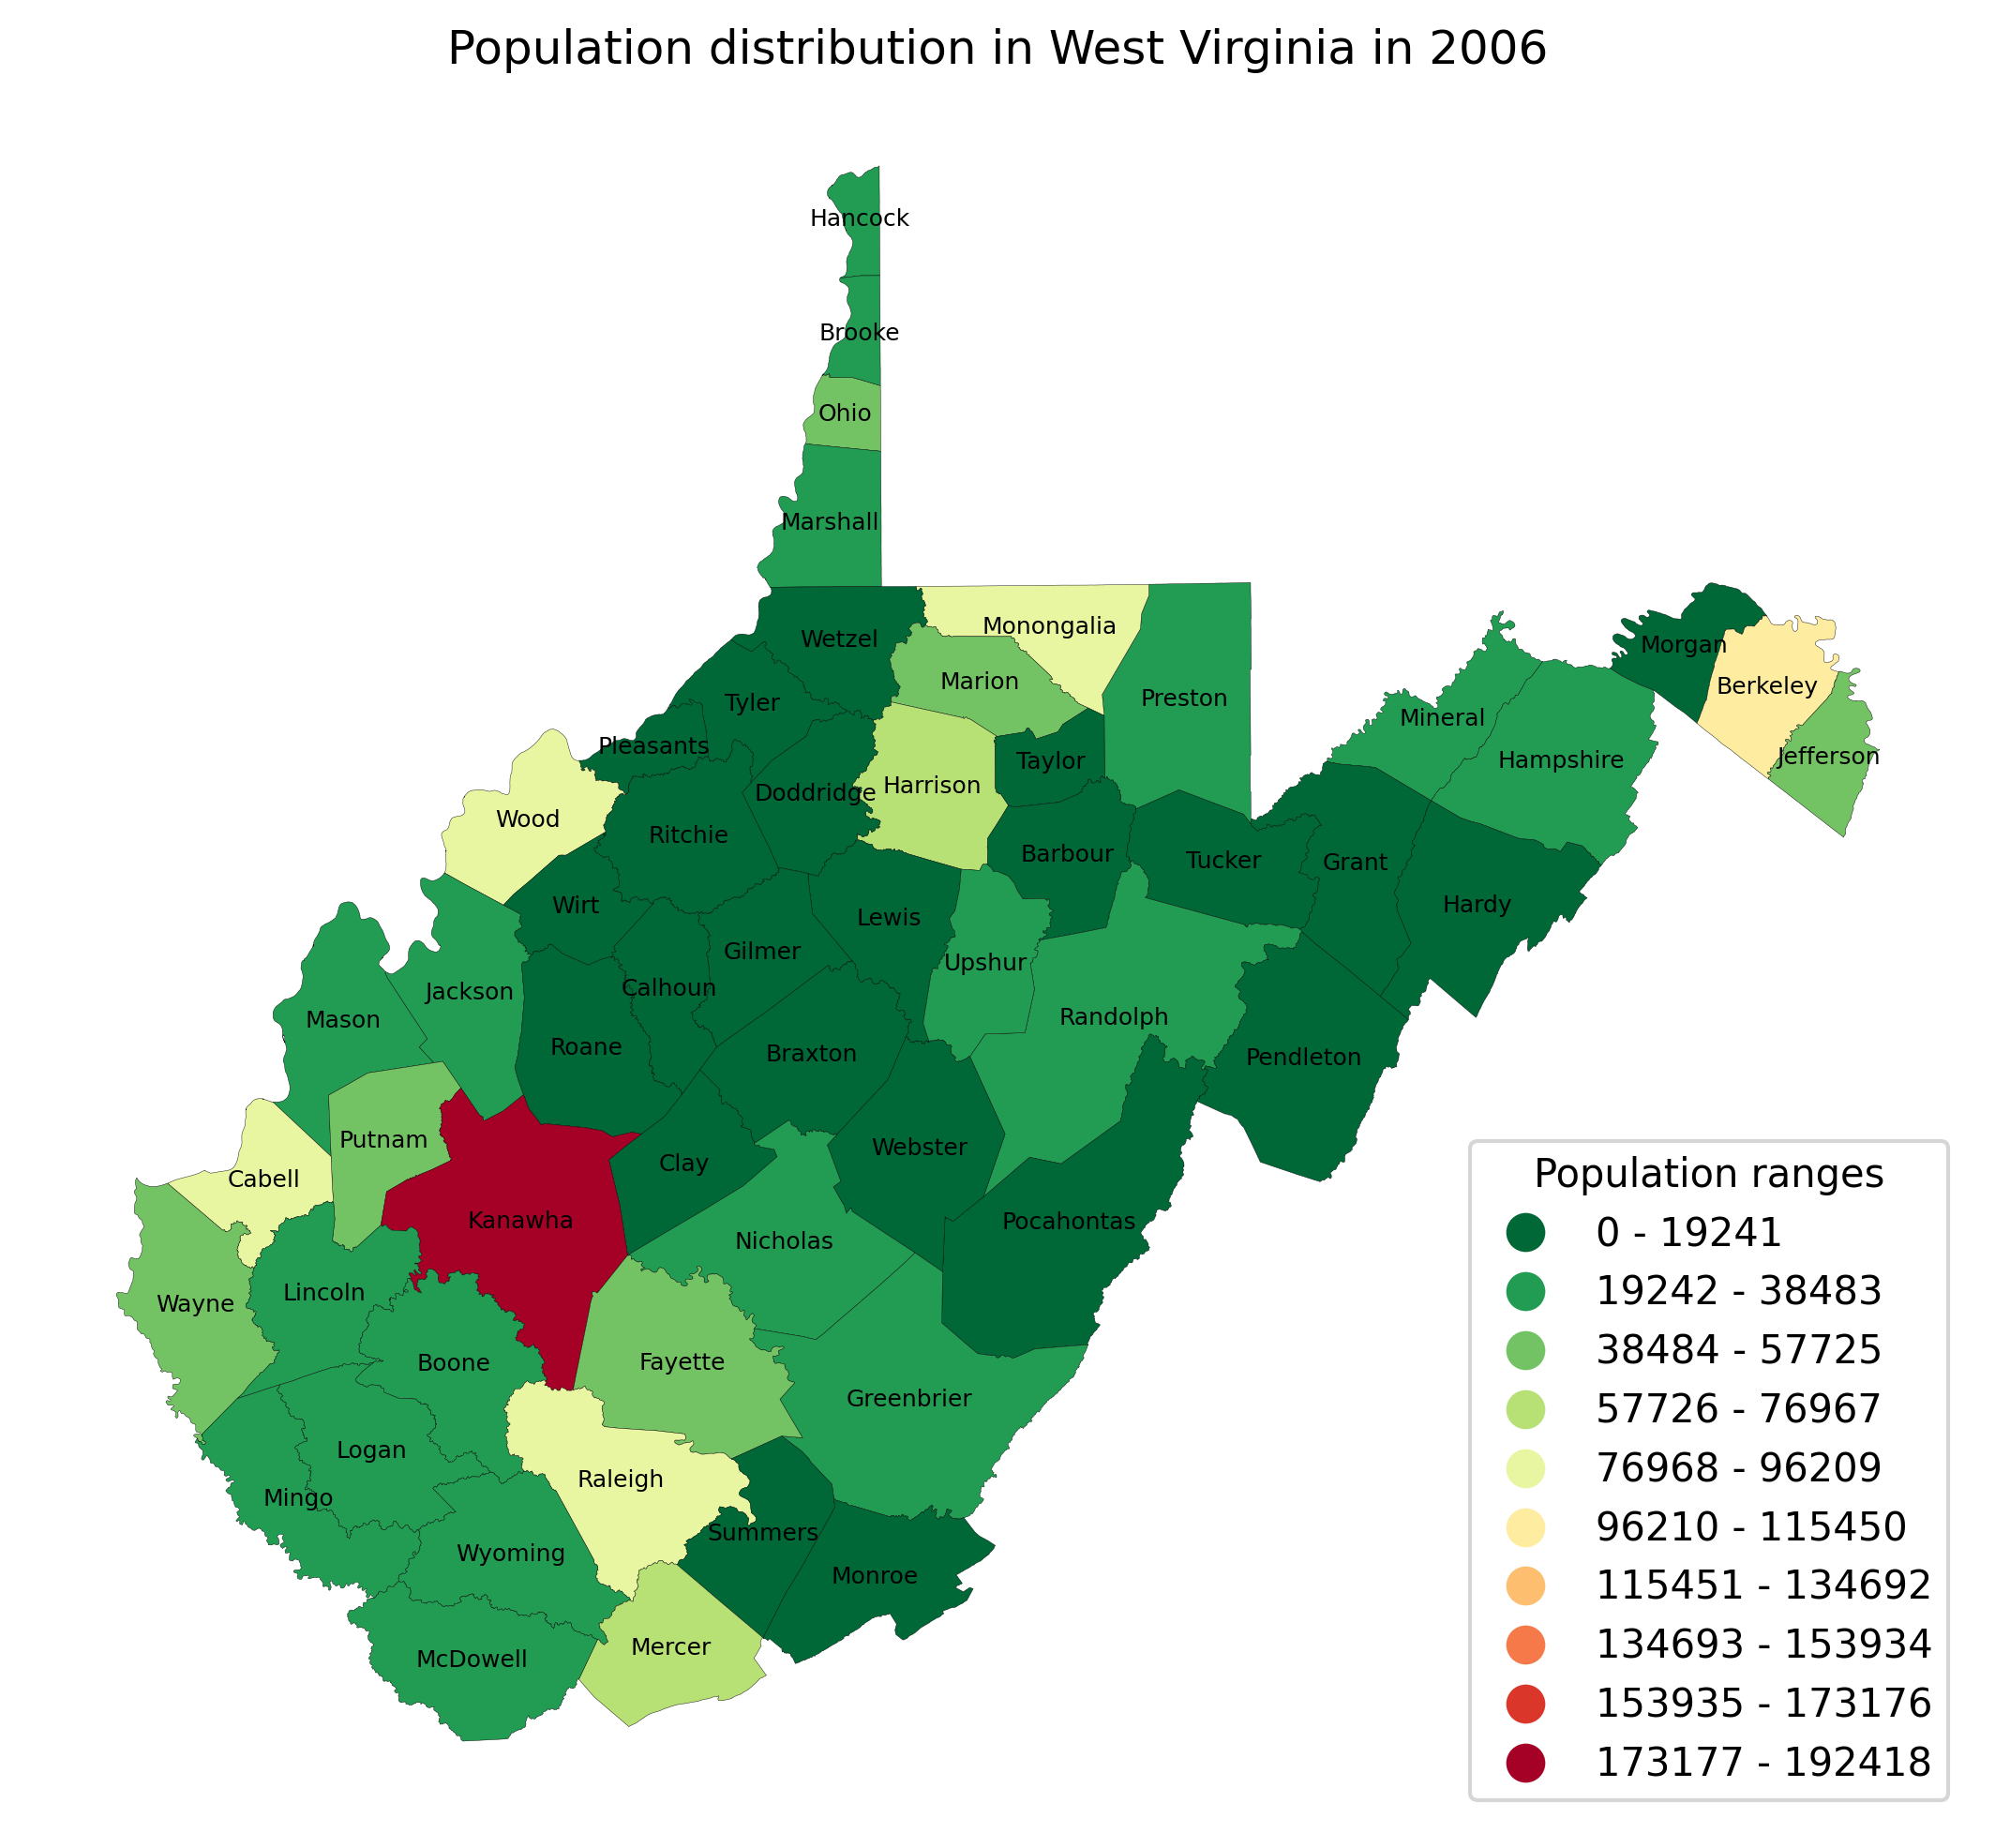

In [ ]:
# Population intervals
bins_fixed_2006 = np.round(np.insert(bins_2006[1:], 0, 0)). astype(int)

# Create the labels for the legend
labels_ranges_2006 = [f"{bins_fixed_2006[i]} - {bins_fixed_2006[i+1]-1}" for i in range(len(bins_fixed_2006)-1)]

# Convert county populations to groups of population ranges
geo_data_aux["bin_2006"] = pd.cut(
    geo_data["2006"],
    bins=bins_fixed_2006,                  # Classification scheme
    include_lowest=True,
    labels = labels_ranges_2006
)

# Show the choropleth map
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

geo_data_aux.plot(
    ax=ax,
    column="bin_2006",                # Data to plot
    cmap=cmap_personalized,           # Color palette
    edgecolor="k",                    # Borderline color
    linewidth=0.1,                    # Borderline width
    legend=True,                      # Add legend
    legend_kwds={
        "title": "Population ranges", # Title of the legend
        "loc": "lower right"          # Allocate the legend
    }
)

# Add the name of each county
for idx, row in geo_data_aux.iterrows():
    # Obtai the centre of the county
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    # Write the name centered
    ax.text(x, y, str(row['NAME']), fontsize=6, ha='center', va='center')

ax.set_title("Population distribution in West Virginia in 2006")
ax.set_axis_off()


By 2006, population levels are substantially higher across all counties, as reflected by the much larger class ranges in the legend. Kanawha County remains the most populous, but several counties, particularly Berkeley, Monongalia, Raleigh, and Cabell, also appear in high population categories. Despite this overall increase, many counties continue to occupy lower relative classes, showing that population growth has been uneven and more strongly concentrated in a subset of counties.

##### Difference

The following choropleth map represents the difference in population per couty between 1900 and 2006

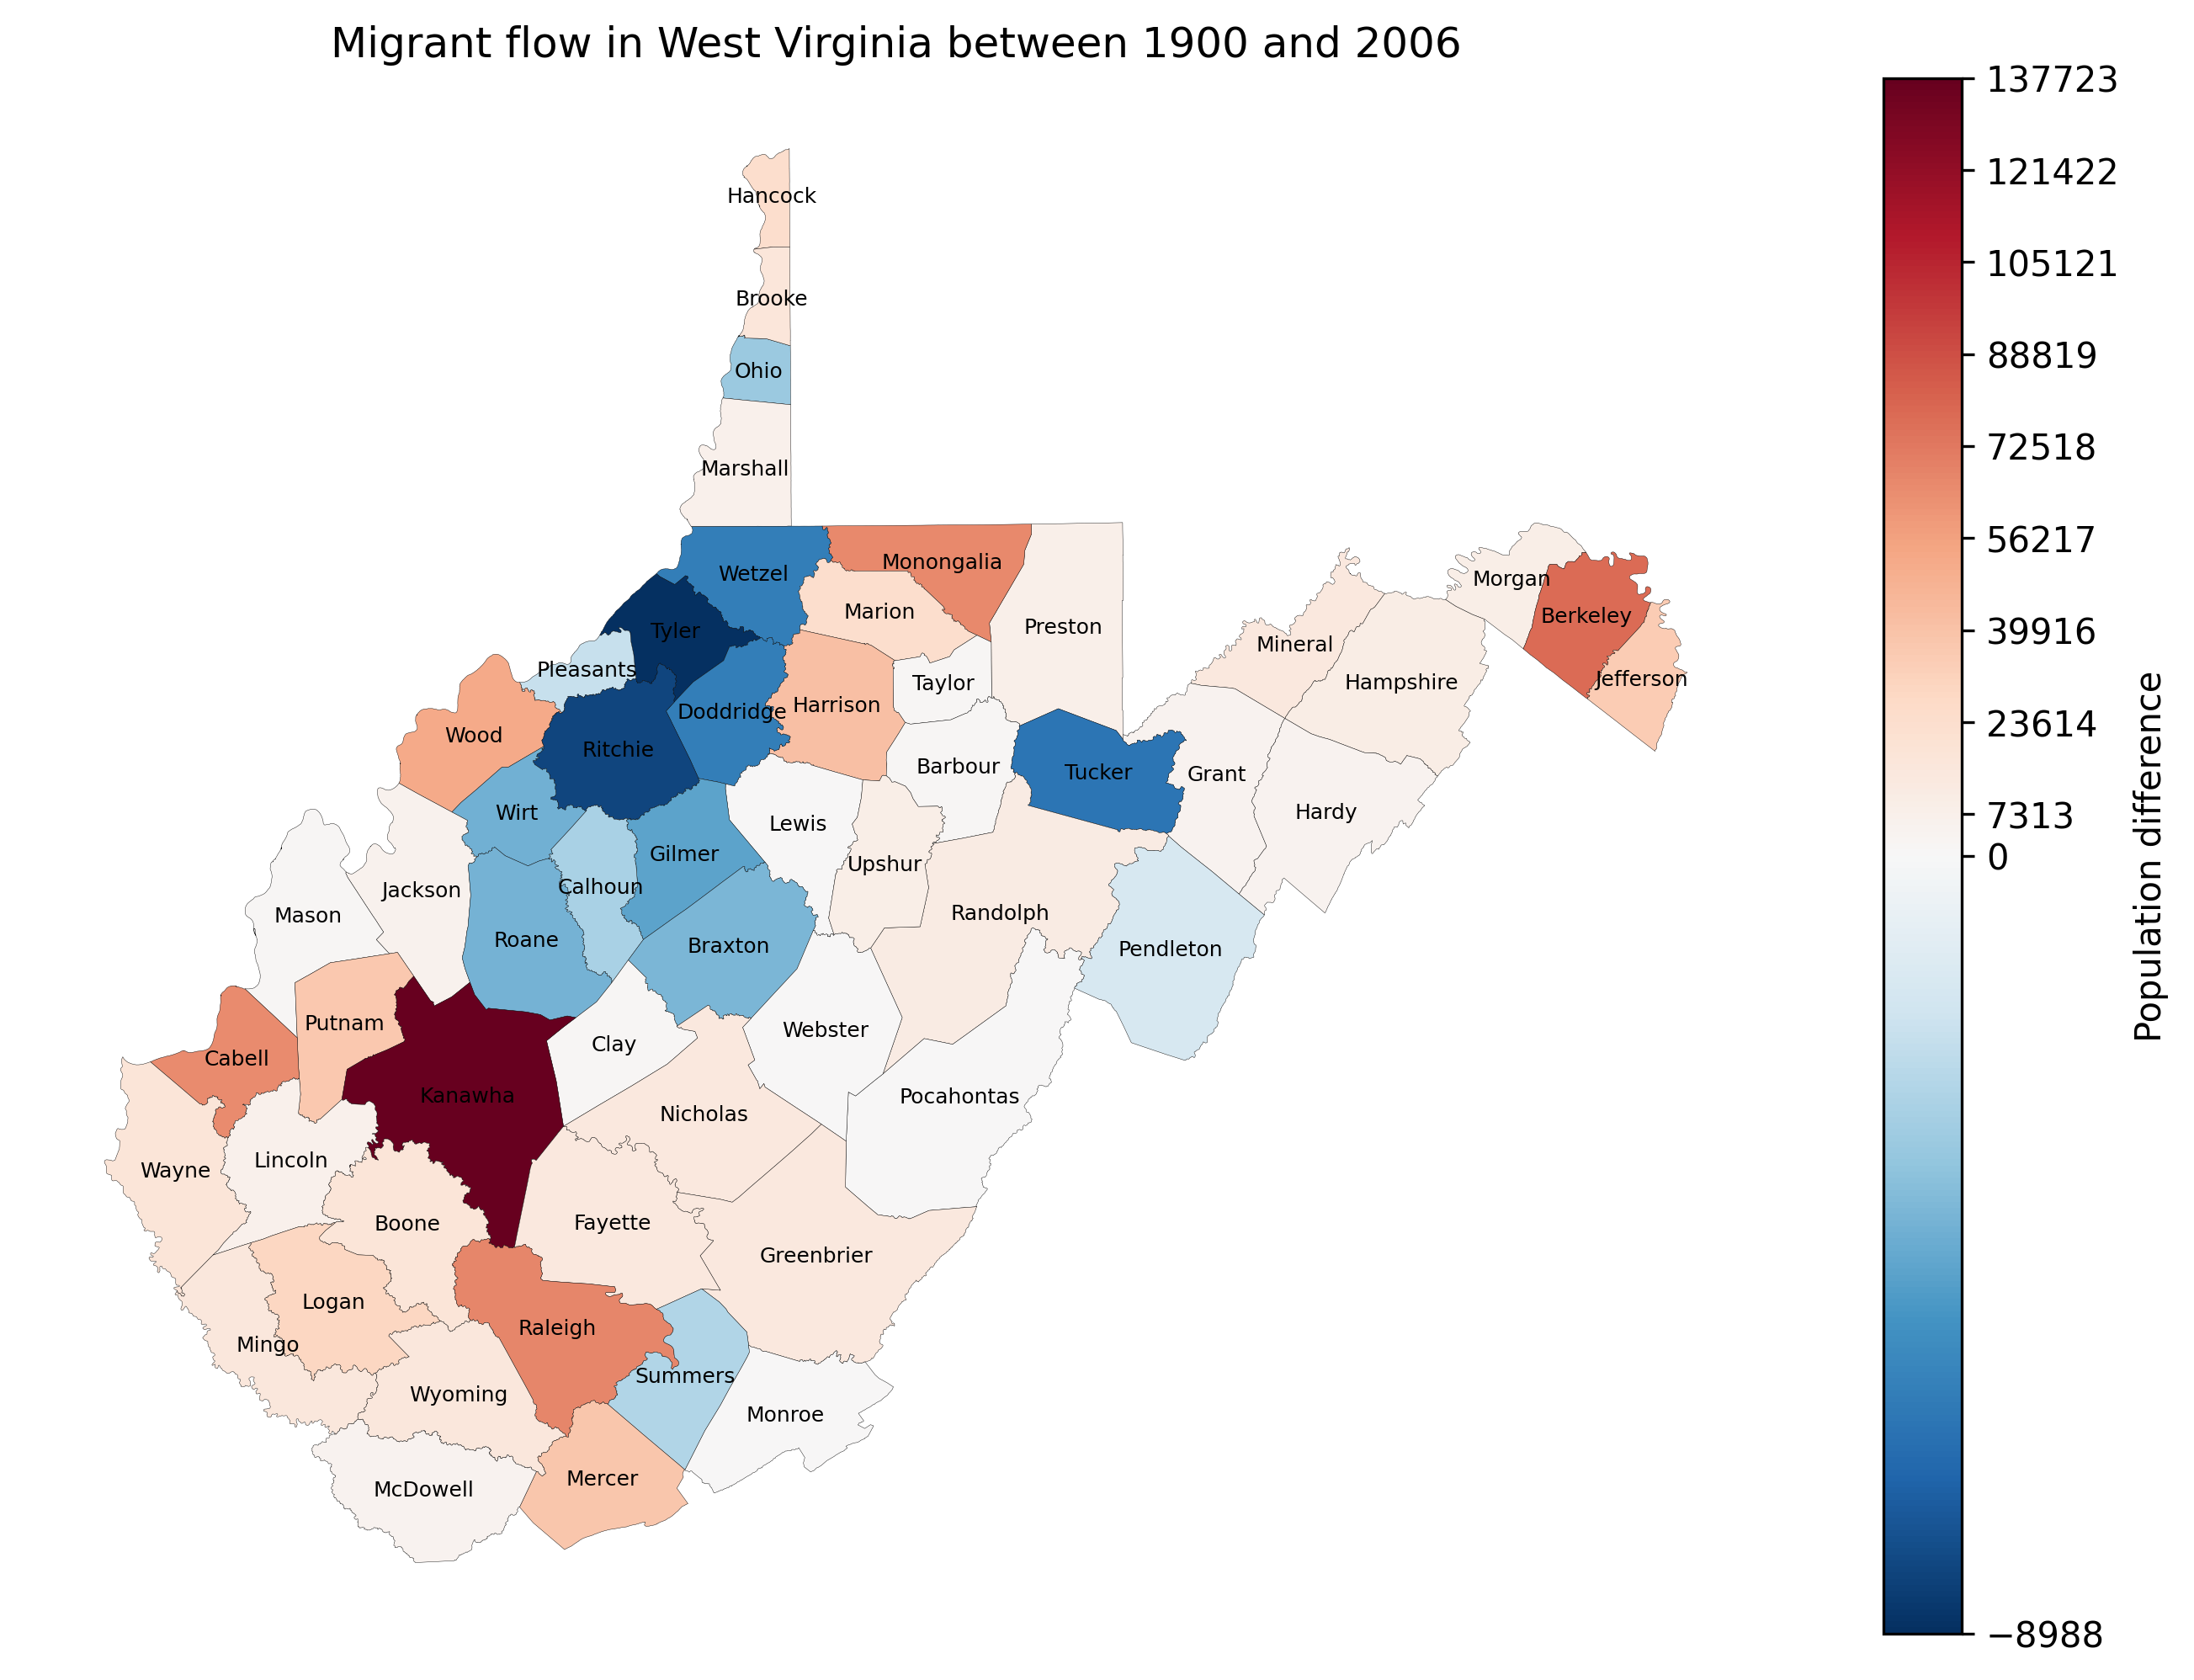

In [ ]:
# Compute the difference of population
population_difference = geo_data['2006'] - geo_data['1900']

# Compute the limits
vmin = population_difference.min()
vmax = population_difference.max()

# Data normalization with the set center for colors representation
normalization = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

# Create 10 ticks for the legend
ticks = np.linspace(vmin, vmax, 10)
ticks = np.insert(ticks, 1, 0)  # Insert the 0 in the second position

# Show the choropleth map
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

geo_data.plot(
    ax=ax,
    column=population_difference,           # Data to plot
    cmap="RdBu_r",                          # Color pallete
    norm=normalization,                     # Color scale normalization
    edgecolor="k",                          # Borderline color
    linewidth=0.1,                          # Borderline width
    legend=True,                            # Add color bar
    legend_kwds={
        "label": "Population difference",
        "orientation": "vertical",
        "ticks": ticks
    }
)

# Add the name of each county
for idx, row in geo_data_aux.iterrows():
    # Obtai the centre of the county
    x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
    # Write the name centered
    ax.text(x, y, str(row['NAME']), fontsize=6, ha='center', va='center', color='k')

ax.set_title("Migrant flow in West Virginia between 1900 and 2006")
ax.set_axis_off()

The map indicates the flux of population suffered in West Virginia between 1900 and 2006. Blue colors means that there has been a dicrese in the population of a county while red means that a county has experized an increase. White represents the scenario where population has keep across time.

The results reveal a mixed but spatially structured pattern of population change. The largest increase over the period has occurred Kanawha county by far. Other counties with significant positive population change include Berkeley, Monongalia, Raleigh, Cabell, and Putnam. These counties are generally associated with urban centers, administrative functions, educational institutions, or proximity to external metropolitan areas, which likely contributed to their demographic growth.

In contrast, several counties experienced population decline, particularly in the central and northern parts of the state. These areas, shown in blue, reflect long-term population losses that are consistent with the decline of traditional extractive and rural-based economies. Counties such as Tyler, Wetzel, Ritchie, Doddridge, and Tucker illustrate this negative trend.

Overall, the map highlights strong spatial inequalities in population change across West Virginia between 1900 and 2006. While some counties experienced sustained growth, many others either stagnated or declined, indicating a long-term process of demographic redistribution driven by economic restructuring, migration, and urban concentration.

## 2. Resident Population Evolution Between 1900 and 2006

n this subsection, the total population of the state of West Virginia is represented. Since the data are unbalanced in terms of the number of years, with a higher frequency of data points in recent years than during the twentieth century, an interpolation is applied for visualization purposes. Assuming that there are generally no strong or sudden population changes, polynomial interpolation can be considered a reasonable approximation.
   

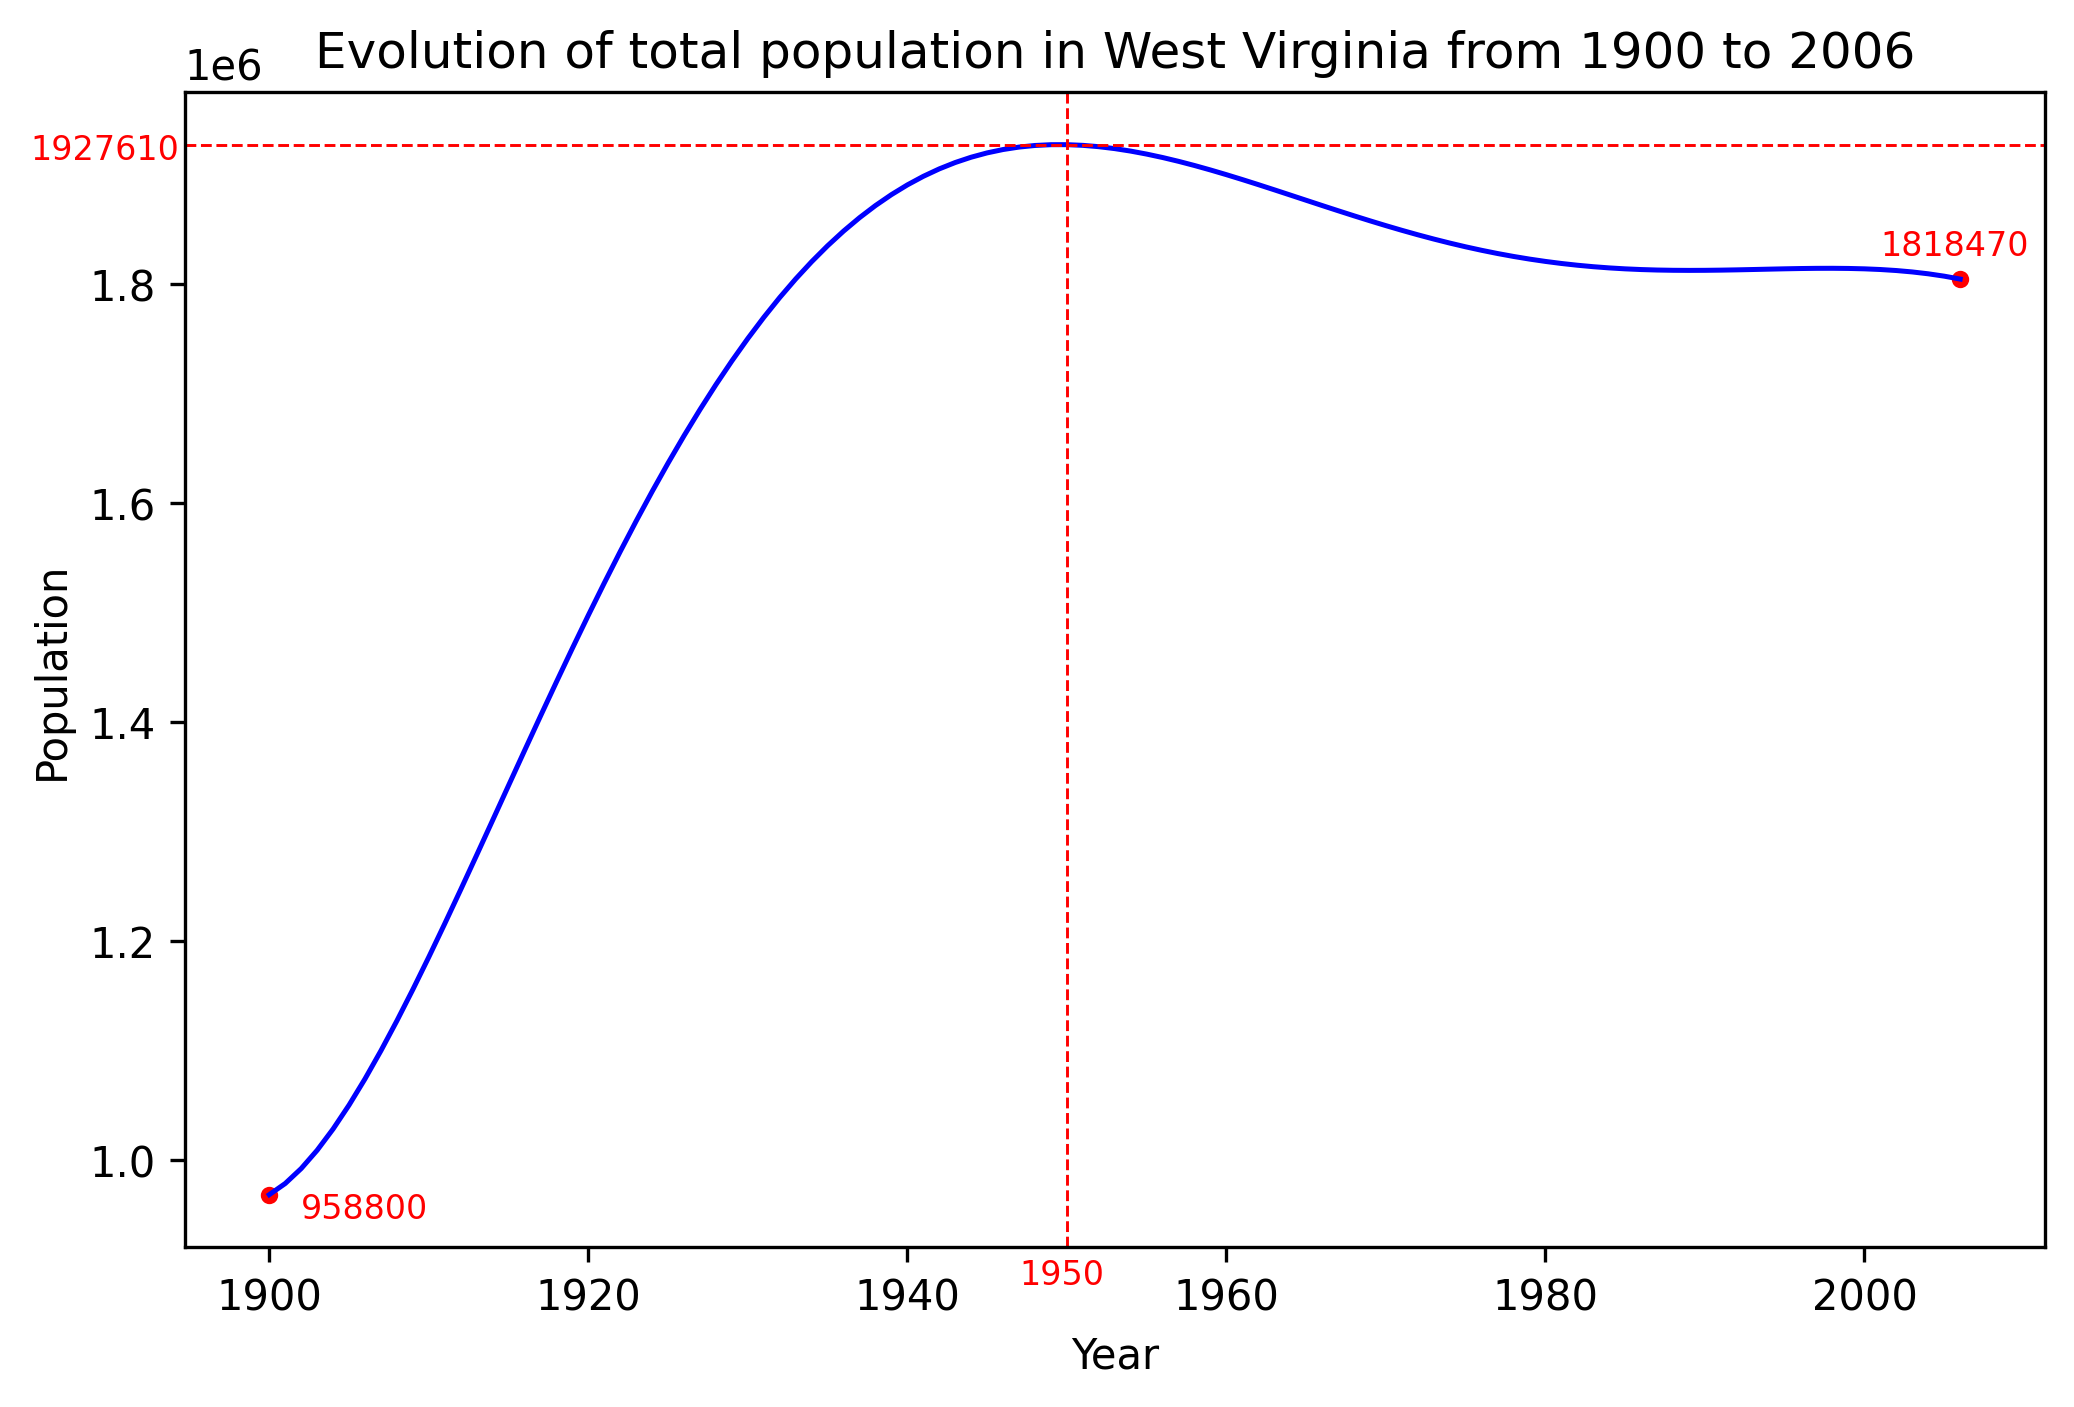

In [ ]:
# Obtain the labels of the years
column_labels = geo_data.columns.tolist()

# Select only the labels of the years
index_1900 = column_labels.index('1900')
index_2006 = column_labels.index('2006')
years = column_labels[index_1900:index_2006+1]
years = [int(y) for y in years]

# Obtain the total population of the state per year
total_population_year = np.array(geo_data.loc[:, '1900':'2006'].sum())

# Create the array with all years
total_years = np.arange(1900, 2007, 1)

# Adjust the polynomial
degree = 6
coef = np.polyfit(np.array(years), total_population_year, degree)

# Evaluate the polynomial at all years (interpolate)
population_interpolated = np.polyval(coef, total_years)

# Show results
plt.figure(figsize=(8, 5), dpi=300)
plt.plot(total_years,population_interpolated,color='blue',linewidth=1.2)

# Find the maximum population and the respective year
max_idx = np.argmax(population_interpolated)
max_year = total_years[max_idx]
max_population = population_interpolated[max_idx]

# Labels in the maximum year
plt.text(1885, max_population-20000, f'{int(max_population)}', color='red', va='bottom', fontsize=8)
plt.text(1947, 0.88e6, f'{max_year}', color='red', va='bottom', fontsize=8)

# Extra labels
plt.text(1902, 0.94e6, f'{total_population_year[0]}', color='red', va='bottom', fontsize=8)
plt.text(2001, 1.82e6, f'{total_population_year[-1]}', color='red', va='bottom', fontsize=8)
plt.scatter(1900,population_interpolated[0],color='red',s=10)
plt.scatter(2006,population_interpolated[-1],color='red',s=10)

# Show the maximum in the representation
plt.axvline(x=max_year, color='red', linestyle='--',  linewidth=0.7)
plt.axhline(y=max_population, color='red', linestyle='--', linewidth=0.7)

plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Evolution of total population in West Virginia from 1900 to 2006")
plt.show()


During the first half of the twentieth century, the population grew rapidly, increasing from about 958,800 in 1900 to a peak of roughly 1.93 million around 1950. After this peak, the population declined steadily for several decades. However, from around 1980 onward, the population trend stabilized, remaining relatively constant with only minor fluctuations through 2006.

## 3. Global Moran’s I Statistic for the Year 2000

Moran’s I is the more popular test statistic for spatial autocorrelation examining whether spatial correlation exists or not over an entire region. Spatial autocorrelation is an assessment of the correlation of a variable in reference to spatial location of the variable, which is a match between location similarity and attribute similarity. (Ref: https://doi.org/10.3390/ijerph9030995)

In [ ]:
# Calculate the spatial weights matrix with a Queen's Adjacency scheme
w = Queen.from_dataframe(geo_data)

# Row-standardization of the weights. This makes each region’s neighbors sum to 1.
w.transform = 'r'

# Convert the data to array in order to adapt the format for hte following function
y = geo_data['2000'].values

# Computes Global Moran’s I for the variable y using the spatial weights w
moran = Moran(y, w)

# Calculate the Moran’s I statistic
print('\nThe value of the Moran\'s I statistic is ',float(moran.I))

Since the value is positive there is clustering meaning that there is spatial autocorrelation between the population and the counties. In other words, the most populated counties and concentred in the same areas while the same happens with the less. While this is true, the value is also very weak (the range is between +-1) revealing that although there is a correlation over the West Virginia state it is very weak. However, since counties have very different sizes and shapes, and neighbors are unevenly distributed, this value could not be reliable at all. Therefore, to verify if this conclusion is correct a hypothesis test using the Monte Carlo method will be made.

### Monte Carlo Evaluation

Monte Carlo simulation creates a series of random datasets by permuting the values among the counties. For each shuffled dataset, the global Moran’s I statistic is calculated. This produces a distribution of Moran’s I values under the null hypothesis of no spatial autocorrelation.

If there is a real spatial pattern in West Virginia, the observed Moran’s I will deviate from the values expected under randomness. After shuffling, the spatial autocorrelation should be around zero (or close to the expected value under the null).

The pseudo p-value (p_sim) is computed as the proportion of simulated Moran’s I values that are as extreme as, or more extreme than, the observed Moran’s I. If this p-value is below a significance level (typically 5%), the null hypothesis is rejected, meaning that the observed spatial pattern is unlikely to have occurred by chance.

In other words, a significant result indicates that neighboring counties tend to have similar values more than would be expected randomly, confirming the presence of spatial autocorrelation in the dataset.

(Ref: Moraga, Paula. (2023). Spatial Statistics for Data Science: Theory and Practice with R. Chapman & Hall/CRC Data Science Series. ISBN 9781032633510)

In [ ]:
# Visualize spatial autocorrelation
plot_moran(moran, zstandard=False, figsize=(10,4))
plt.show()

# Pseudo p-value calculated from the Monte Carlo simulation
print("Monte Carlo p-value:", moran.p_sim)

The p-value represents the proportion of randomly generated datasets in which the Moran’s I statistic is at least as extreme as the observed value. In this case, the p-value exceeds the conventional significance level (0.05), indicating that approximately 12% of the simulated datasets produce a Moran’s I value greater than 0.08. Consequently, the result is not statistically significant. This implies that the observed Moran’s I of 0.08 could plausibly arise by random chance under the null hypothesis of no spatial autocorrelation. Therefore, there is insufficient evidence to conclude that the data exhibit a meaningful spatial pattern. This is also verified on the left panel where, in grey the empirical distribution generated from simulating 999 random maps with the values of the population variable and then calculating Moran’s I for each of those maps. The blue rug signals the mean. In contrary, the red rug shows Moran’s I calculated for the variable using the geography observed in the dataset. It is clear the value under the observed pattern is higher than under randomness. Still, it is too close, so it is not statistically significant.
This insight is confirmed on the right panel, where no correlation is perceived because it represents people per county in "x" axis, the average of population in neighboring counties in "y" and  each sample a county, so ideally it should look like a diagonal. The more people in a county, the more people in the neighbours.

## 4. Local Moran’s I analysis for year 2000

Local Moran's I statistic is the most popular analysis from those defined as LISA (Local Indicators of Spatial Association). As Global Moran's I statistic, it also provides a measure of how similar locations are to their neighbours in terms of population. In contrast, it defines the local spacial autocorrelation, i.e. defines the similarity of a spatial unit to its neighbors and studies the statistical significance of that dependence.
The values of the Local Moran's I can be plotted in a scatterplot to show the relationship between each location and its mean. The x-axis represents the values at each location, while the y-axis represents the value in the neighbourhood of that location. Therefore, values in the top-right of the scatterplot represent locations in which the attribute at i and its neighbours are well above the mean, indicating postive spatial autocorrelation. Points in the lower-corner of the plot indicate locations in which the attribute at i and its neighbours are below the mean. This also represents locations of positive spatial autocorrelation becuase nearby locations are similar. The solid diagonal line is a best-fit line through the points, indicating the presence of positive spatial autocorrelation throughout the entire dataset. The remaining sectors represent locations with negative autocorrelation. (Ref: https://storymaps.arcgis.com/stories/5b26f25bb81a437b89003423505e2f71)

In [ ]:
# Caluclate the local
moran_loc = Moran_Local(y, w)

# Represent the Moran Local Scatterplot, the LISA cluster map and the choropleth map
plot_local_autocorrelation(moran_loc, geo_data, '2000')

plt.show()

The counties with a large population whose neighbors also have large populations are marked in red (hot spots). Those with low populations and similarly low-population neighbors are marked in blue (cold spots). Both of them are known as spatial clusters. Following, the areas with high population surrounded by regions with low populations are shown in orange, while the opposite situation is represented in light blue. The remaining counties, where the analysis results were not statistically significant, are painted in gray.

As seen in the global case, there is a slight positive slope in the scatterplot, suggesting a weak but present spatial autocorrelation overall. From the LISA cluster map, it can be inferred that a high-population region exists in the south, while a low-population region is located in the north. Additionally, a few counties in the west appear as statistical anomalies relative to their neighbors. Finally, this pattern can be verified by looking at the choropleth map: the southern counties clearly show higher values (darker shades), the northern counties show lower values (lighter shades), and the areas where the color pattern blends, indicating weak clustering—correspond to the “non-significant” (grey) counties on the LISA map.